In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [5]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [6]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [7]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [8]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [9]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

## Prediction ##

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [10]:
galton = Table.read_table('galton.csv')

heights = Table().with_column(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [11]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


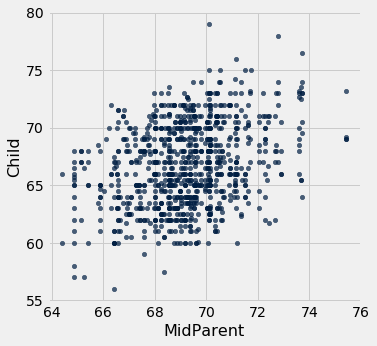

In [12]:
heights.scatter('MidParent')

In [13]:
def predict_child(x):
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('Child'))

In [14]:
predictions = heights.apply(predict_child, 'MidParent')

In [15]:
heights = heights.with_column(
    'Original Prediction', predictions
)

In [16]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


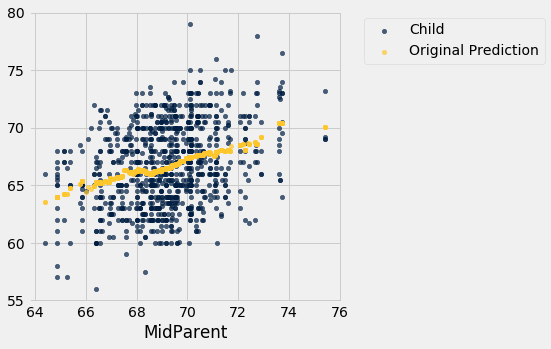

In [17]:
heights.scatter('MidParent')

## Linear Regression ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

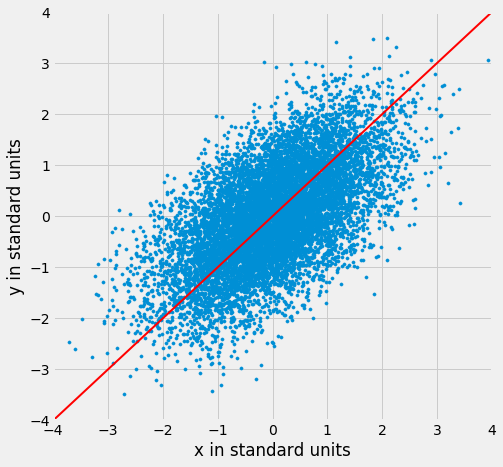

In [18]:
trial_line()

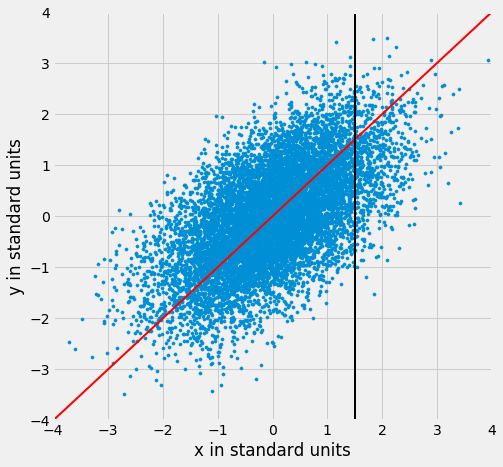

In [19]:
trial_with_vertical()

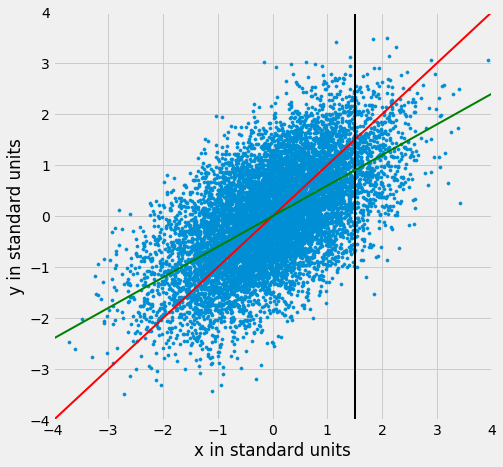

In [20]:
both_with_vertical()

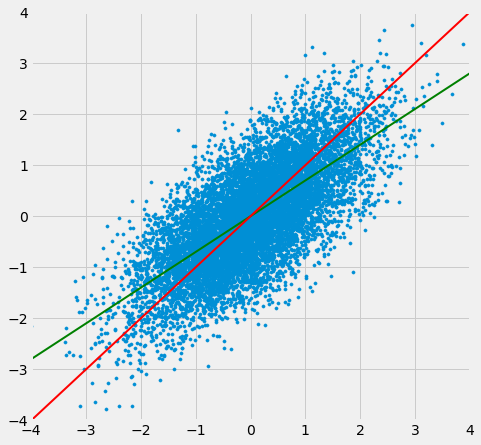

In [21]:
r = 0.7
regression_line(r)

## Equation of the Regression Line ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

#### Muqadder's Notes: Since the equation of a straight line is y = m\*x + c, in order to find a linear predictor for y, we have to find the slope (m) and the intercept (c). 

We also know that, y_su = r * x_su (where y_su is y represented in standard units and r is the correlation coefficient). Replacing y_su and x_su with their equivalent y and x representations respectively, we'll get:

y - y_avg/y_sd = r * (x - x_avg)/x_sd

Solving the above linear equation such that it represents the general equation of a line, we'll get:-

Slope (i.e m) = r \* y_sd/x_sd
Intercept (i.e c) = y_avg - slope \* x_avg

#### We just implemented the Linear Regression Model of Scikit-learn Python library!!!!!!

In [32]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [33]:
heights

MidParent,Child,Original Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


In [34]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [35]:
heights.take(123)

MidParent,Child,Original Prediction,Regression Prediction
69.48,71.5,66.7588,66.9201


In [36]:
galton_slope * 69.48 + galton_intercept

66.92007567102915

In [37]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [38]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

In [39]:
heights = heights.with_column(
    'Regression Prediction', regression_predictions
)

In [40]:
heights

MidParent,Child,Original Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


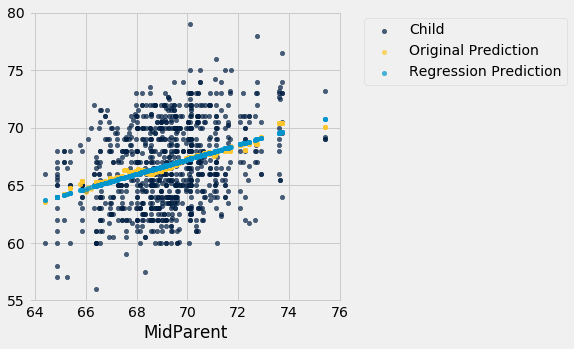

In [41]:
heights.scatter('MidParent')